In [4]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [6]:
df = pd.read_csv('data.csv')
length = len(df)
df = df[df['correct'] == 1]
df.describe()

,length_context,length_question,length_entities,entity_num,correct
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.0
mean,3805.102368,83.282033,22.568245,5.652507,1.0
std,2106.022127,21.074594,15.202473,5.837020,0.0
min,529.000000,26.000000,4.000000,0.000000,1.0
25%,2140.750000,70.000000,14.000000,2.000000,1.0
50%,3312.500000,82.000000,20.000000,4.000000,1.0
75%,5195.000000,95.000000,28.000000,8.000000,1.0
max,11046.000000,173.000000,396.000000,50.000000,1.0


In [7]:
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(int(y / len(df) * 100))

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

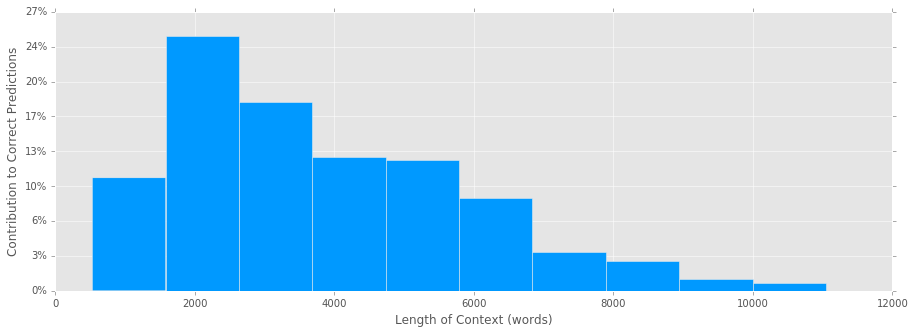

In [8]:
formatter = FuncFormatter(to_percent)
ax = df['length_context'].plot(kind='hist', bins=10, color="#0099FF")
ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Contribution to Correct Predictions')
ax.set_xlabel('Length of Context (words)')